In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


# 1-Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# `Read_Csv File`

In [3]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.shape

(569, 32)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2-Data_Wrangling
- **Assessment of Data**
- **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- **change dtype of diagnose to category**

In [6]:
df['diagnosis']=df['diagnosis'].astype('category')

In [7]:
df.duplicated().sum()

0

<AxesSubplot:>

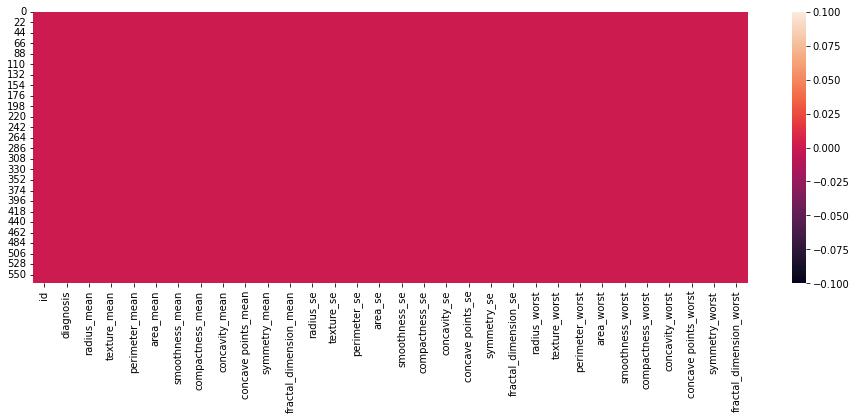

In [8]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull())

- **No missing values present in the dataset**

<AxesSubplot:>

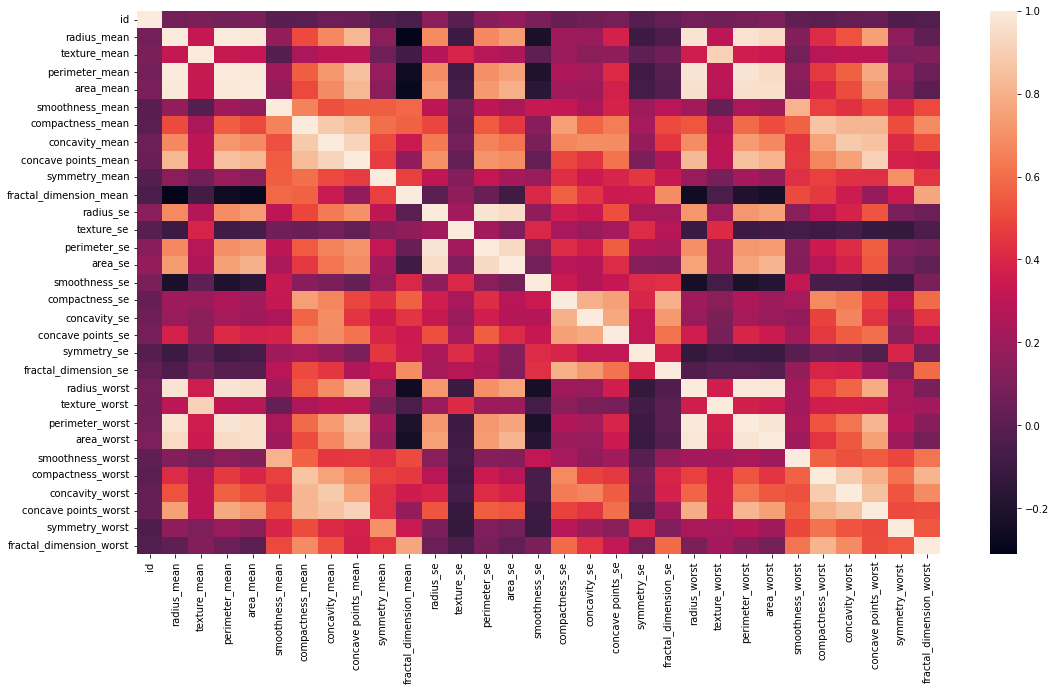

In [9]:
plt.figure(figsize=(18,10
                   
                   ))
sns.heatmap(df.corr())

In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(df, 0.75)
len(set(corr_features))

18

In [12]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

- **All the features represents above,have almost similar impact on the target including,id col will also not creating any impact on target.**

- **So dropping all the cols**

In [13]:
df.drop(columns={'id','area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'},inplace=True)

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364


# 3- EDA
- **Univariate Analysis**
- **Biavariate Analysis**


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

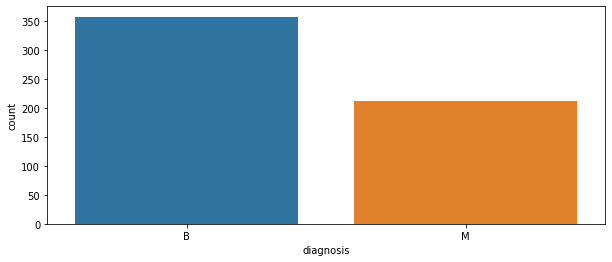

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(df['diagnosis'],label='count')

<AxesSubplot:xlabel='radius_mean', ylabel='count'>

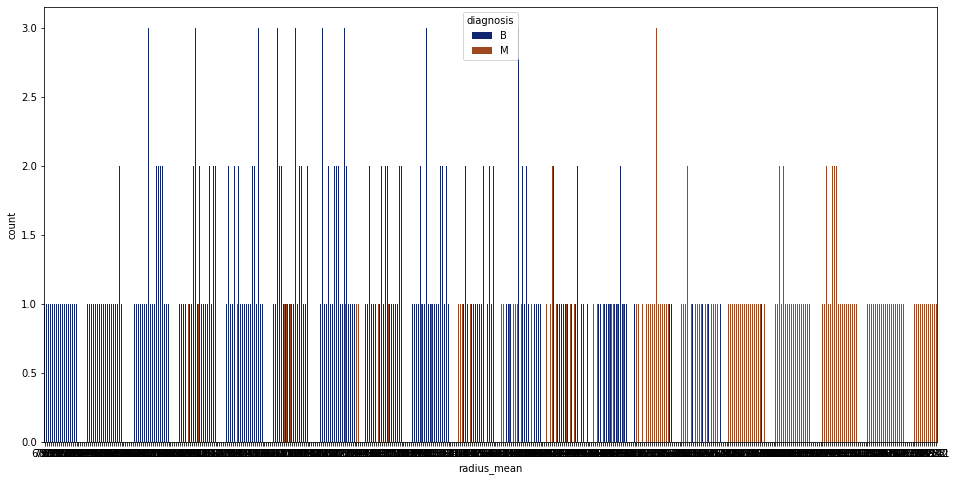

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(df['radius_mean'],hue=df['diagnosis'],palette='dark')

- **Most of the tumors are beningn and have low mean_radius.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9423795716730992
0.8455216229065377


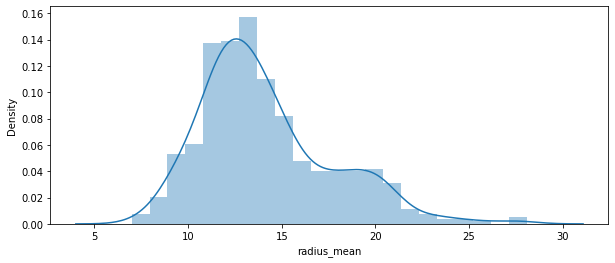

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(df['radius_mean'])
print(df['radius_mean'].skew())
print(df['radius_mean'].kurt())

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

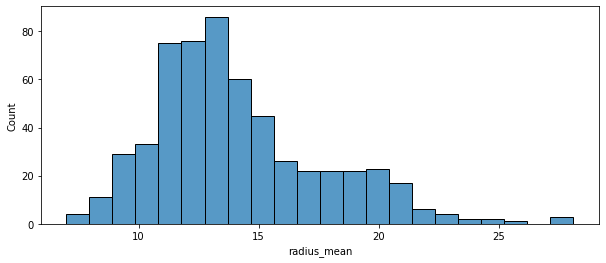

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(df['radius_mean'])

- **Most of the tumors lies in size range of (12,15)**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='radius_mean'>

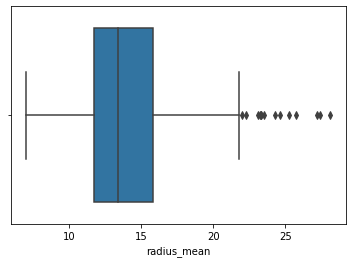

In [19]:
sns.boxplot(df['radius_mean'])

1.1901230311980404
1.650130467219256


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


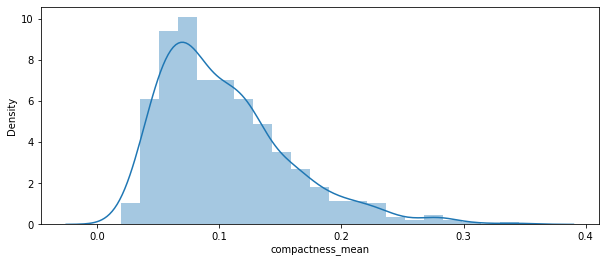

In [20]:
plt.figure(figsize=(10,4))
sns.distplot(df['compactness_mean'])
print(df['compactness_mean'].skew())
print(df['compactness_mean'].kurt())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='compactness_mean'>

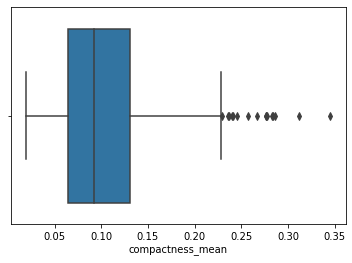

In [21]:
sns.boxplot(df['compactness_mean'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='symmetry_worst', ylabel='count'>

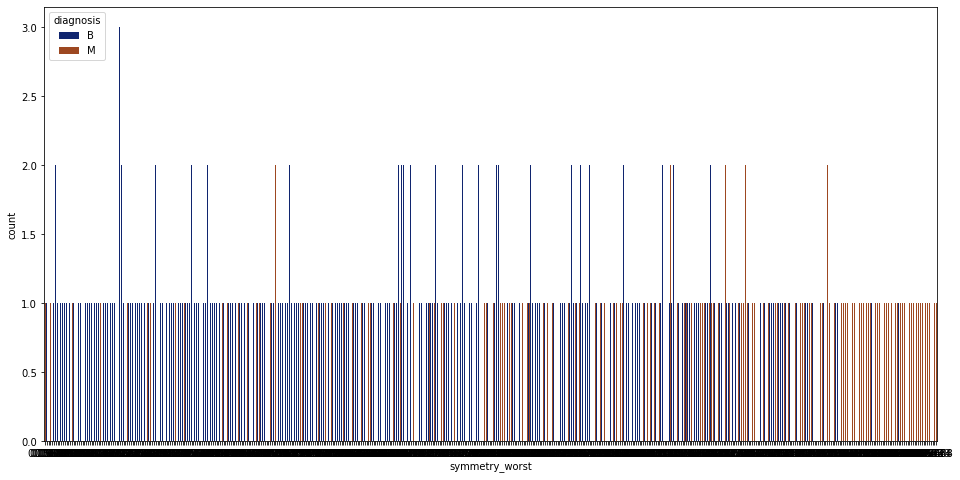

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(df['symmetry_worst'],hue=df['diagnosis'],palette='dark')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

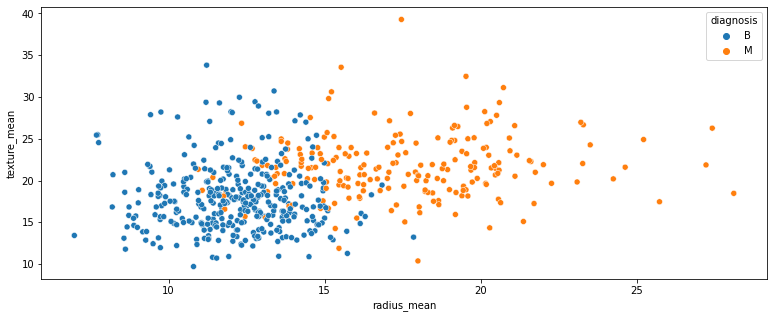

In [23]:
#Multivariate Analysis
plt.figure(figsize=(13,5))
sns.scatterplot(df['radius_mean'],df['texture_mean'],hue=df['diagnosis'])

- **Radius_mean and texture mean for malignant tumor is higher than for beningn tumor.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='compactness_mean', ylabel='smoothness_mean'>

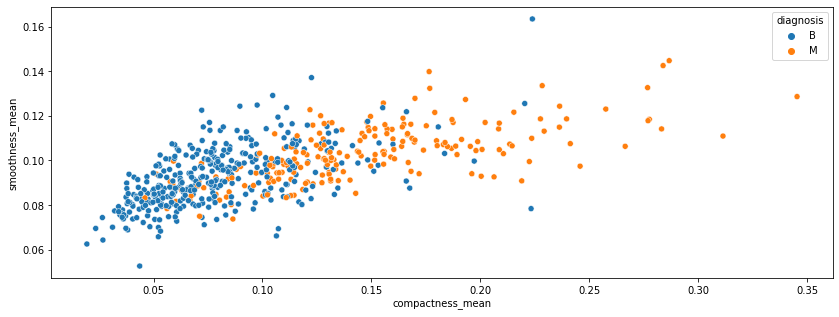

In [24]:
plt.figure(figsize=(14,5),)
sns.scatterplot(df['compactness_mean'],df['smoothness_mean'],hue=df['diagnosis'])

- **compactness_mean and smoothness_mean both are higher for Beningn tumor.** 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'smoothness_mean'),
  Text(3, 0, 'compactness_mean'),
  Text(4, 0, 'symmetry_mean'),
  Text(5, 0, 'fractal_dimension_mean'),
  Text(6, 0, 'radius_se'),
  Text(7, 0, 'texture_se'),
  Text(8, 0, 'smoothness_se'),
  Text(9, 0, 'compactness_se'),
  Text(10, 0, 'symmetry_se'),
  Text(11, 0, 'symmetry_worst')])

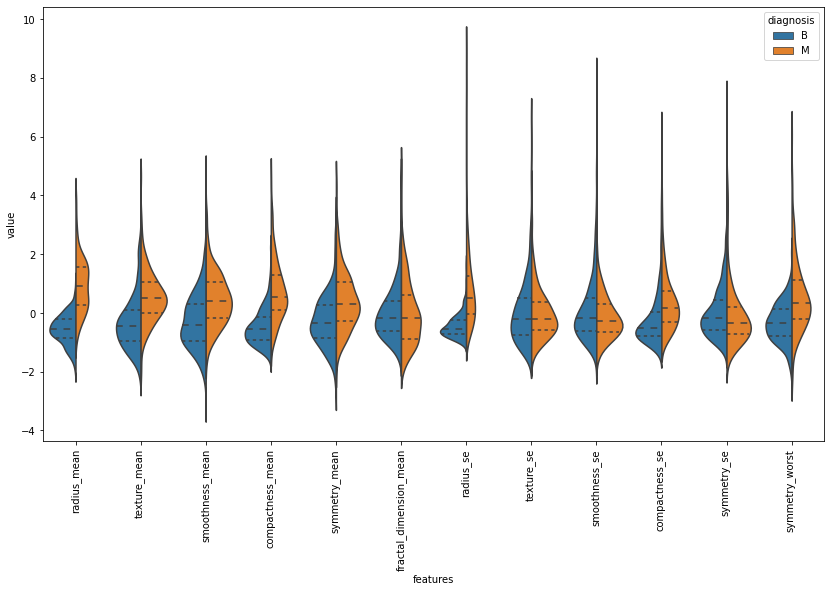

In [25]:
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop diagnosis since we are separating labels and features
# X includes our features
X = df.drop(columns={'diagnosis'})
# get the first ten features
data_dia = y
data = X
data_std = (data-data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:12]],axis=1)
data = pd.melt(data,id_vars='diagnosis',
 var_name='features',
 value_name='value')
# make a violin plot
plt.figure(figsize=(14,8))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data,split=True, inner='quart')
plt.xticks(rotation=90)

- **The median for fractal_dimension_mean ,smoothness_se,texture_se symmetry_se are very close to each other.It means,these features does'nt create too much impact on the target variable.**

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

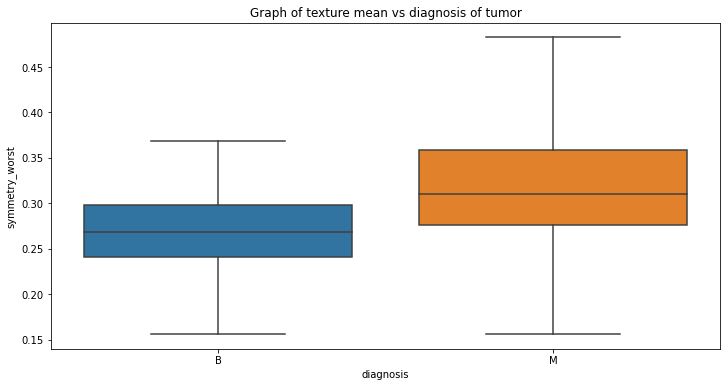

In [26]:
plt.figure(figsize=(12,6))
plot = sns.boxplot(x=df['diagnosis'], y=df['symmetry_worst'], showfliers=False)
plot.set_title('Graph of texture mean vs diagnosis of tumor')

- **Interqurtile range for malignannt tumor is higher and its median level is also on the higher side than beningn tumor.**

Text(0.5, 1.0, 'Graph of radius_se vs diagnosis of tumor')

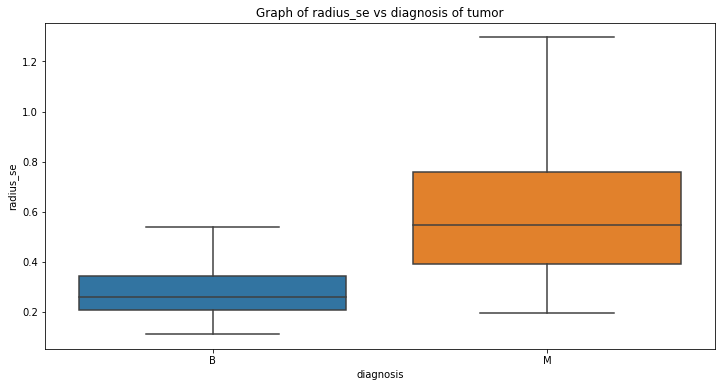

In [27]:
plt.figure(figsize=(12,6))
plot = sns.boxplot(x=df['diagnosis'], y=df['radius_se'], showfliers=False)
plot.set_title('Graph of radius_se vs diagnosis of tumor')

Text(0.5, 1.0, 'Graph of radius_se vs diagnosis of tumor')

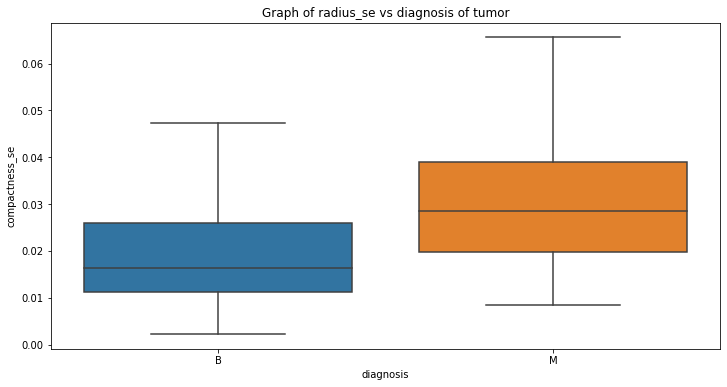

In [28]:
plt.figure(figsize=(12,6))
plot = sns.boxplot(x=df['diagnosis'], y=df['compactness_se'], showfliers=False)
plot.set_title('Graph of radius_se vs diagnosis of tumor')

Text(0.5, 1.0, 'Graph of radius_se vs diagnosis of tumor')

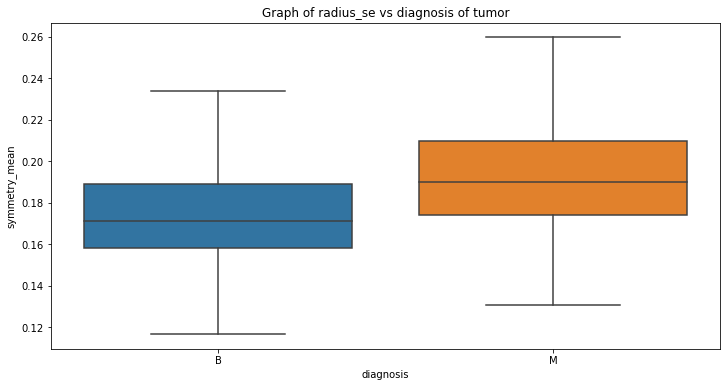

In [29]:
plt.figure(figsize=(12,6))
plot = sns.boxplot(x=df['diagnosis'], y=df['symmetry_mean'], showfliers=False)
plot.set_title('Graph of radius_se vs diagnosis of tumor')

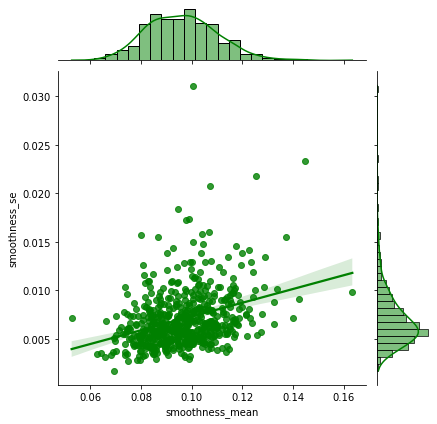

In [30]:
sns.jointplot(x = df['smoothness_mean'], y = df['smoothness_se'],
              kind = "reg",color='g')
plt.show()

- **Smoothness_mean and smoothness_se does'nt have highly linear relationship.**

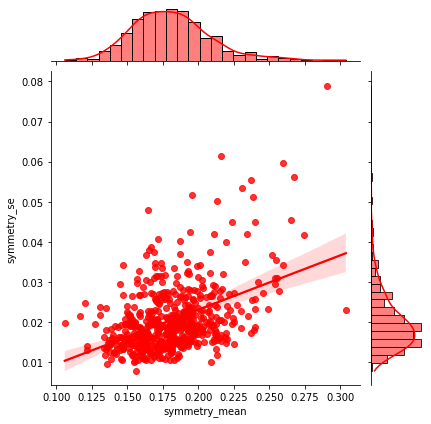

In [31]:
sns.jointplot(x = df['symmetry_mean'], y = df['symmetry_se'],
              kind = "reg",color='r')
plt.show()

- **Dropping fractal_dimension_mean,smoothness_se,texture_se,symmetry_se as they does'nt impact the target very much.**

In [32]:
df.drop(columns={'fractal_dimension_mean','smoothness_se','texture_se','symmetry_se'},inplace=True)

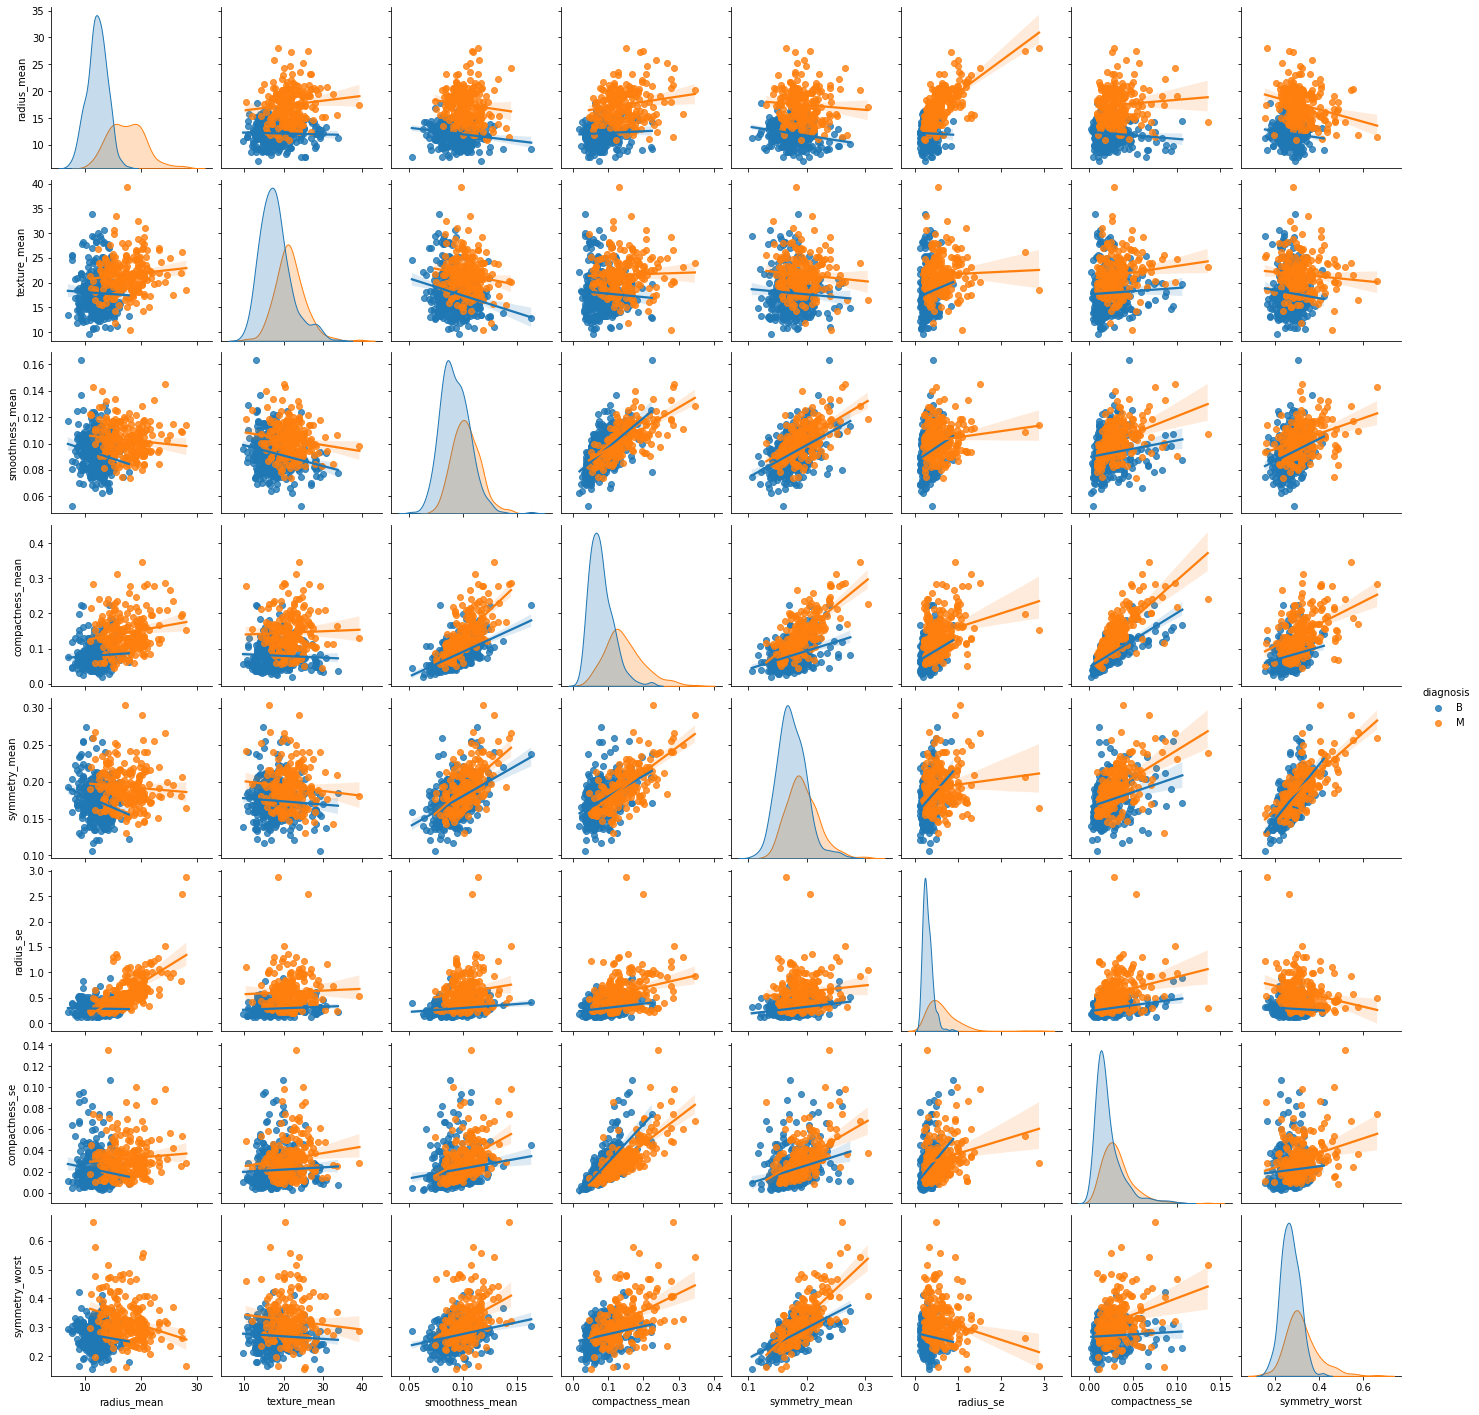

In [33]:
sns.pairplot(df,kind='reg',hue='diagnosis')

**Label Encoding**

In [34]:
label_encoding=LabelEncoder()
df['diagnosis']=label_encoding.fit_transform(df['diagnosis'])

In [35]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,compactness_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.04904,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.01308,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.04006,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.4956,0.07458,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.02461,0.2364


**Treament of Outliers by using IQR method and capping them.**

In [36]:
def Remove_outliers(df,col):
    
    percentile_25=df[col].quantile(0.25)
    percentile_75=df[col].quantile(0.75)

    IQR = percentile_75-percentile_25
    Upper_limit=percentile_75+1.5*IQR
    Lower_limit=percentile_25-1.5*IQR
    df[col]=np.where(df[col]>Upper_limit,Upper_limit,
                           np.where(df[col]<Lower_limit,Lower_limit,df[col]))
    return df[col]

In [37]:
df['radius_mean']=Remove_outliers(df,'radius_mean')
df['texture_mean']=Remove_outliers(df,'texture_mean')
df['smoothness_mean']=Remove_outliers(df,'smoothness_mean')
df['compactness_mean']=Remove_outliers(df,'compactness_mean')
df['symmetry_mean']=Remove_outliers(df,'symmetry_mean')
df['radius_se']=Remove_outliers(df,'radius_se')
df['compactness_se']=Remove_outliers(df,'compactness_se')
df['symmetry_worst']=Remove_outliers(df,'symmetry_worst')

In [38]:
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,compactness_se,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.062916,19.254736,0.096266,0.103222,0.180734,0.384698,0.024561,0.287616
std,0.483918,3.340025,4.187510,0.013685,0.049386,0.026067,0.203612,0.014947,0.053868
min,0.000000,6.981000,9.710000,0.057975,0.019380,0.111200,0.111500,0.002252,0.156500
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.161900,0.232400,0.013080,0.250400
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.179200,0.324200,0.020450,0.282200
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.195700,0.478900,0.032450,0.317900
max,1.000000,21.900000,30.245000,0.133695,0.228620,0.246400,0.848650,0.061505,0.419150


# 4- Model Building

- Segregation of features and target

In [39]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

**Scaling**

In [41]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [42]:
LC=LogisticRegression()
LC.fit(X_train,y_train)
y_pred=LC.predict(X_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [43]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)

0.9473684210526315

In [44]:
ADC=AdaBoostClassifier()
ADC.fit(X_train,y_train)
y_pred=ADC.predict(X_test)
accuracy_score(y_test,y_pred)

0.9298245614035088

In [45]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [46]:
Kn=KNeighborsClassifier()
Kn.fit(X_train,y_train)
y_pred=Kn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9210526315789473

- **Analysis of accuracy_score and classification report for different classifiers.**

In [47]:
def Clf(X,y):
    
    target_names=['class_0','class_1']
    
    LC=LogisticRegression()
    LC.fit(X_train,y_train)
    y_pred=LC.predict(X_test)
    LC_acc=round(accuracy_score(y_test,y_pred),2)
    print('Logistic_Regression acc_score: '+ str(LC_acc))
    print('LC Class_report:'+str(classification_report(y_test,y_pred,target_names=target_names)))
    print('*'*50)
    
    RFC=RandomForestClassifier()
    RFC.fit(X_train,y_train)
    y_pred=RFC.predict(X_test)
    RFC_acc= round(accuracy_score(y_test,y_pred),2)
    print('RFC acc_score: '+ str(RFC_acc))
    print('RFC Class_report: '+ str(classification_report(y_test,y_pred,target_names=target_names)))
    print('*'*50)
    
    ADC=AdaBoostClassifier()
    ADC.fit(X_train,y_train)
    y_pred=ADC.predict(X_test)
    ADC_acc=round(accuracy_score(y_test,y_pred),2)
    print('Adaboost clf acc_score: ' +str(ADC_acc))
    print('ADC Class_report: '+ str(classification_report(y_test,y_pred,target_names=target_names)))
    print('*'*50)
    
    GBC=GradientBoostingClassifier()
    GBC.fit(X_train,y_train)
    y_pred=GBC.predict(X_test)
    GBC_acc=round(accuracy_score(y_test,y_pred),2)
    print('GradBoost acc_score: '+ str(GBC_acc))
    print('GBC Class_report: '+ str(classification_report(y_test,y_pred,target_names=target_names)))
    print('*'*50)
    
    Kn=KNeighborsClassifier()
    Kn.fit(X_train,y_train)
    y_pred=Kn.predict(X_test)
    Kn_acc=round(accuracy_score(y_test,y_pred),2)
    print('Knn acc_score: ' +str(Kn_acc))
    print('KNN Class_report: '+ str(classification_report(y_test,y_pred,target_names=target_names)))
    

In [48]:
Clf(X,y)

Logistic_Regression acc_score: 0.96
LC Class_report:              precision    recall  f1-score   support

     class_0       0.94      0.98      0.96        66
     class_1       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

**************************************************
RFC acc_score: 0.96
RFC Class_report:               precision    recall  f1-score   support

     class_0       0.94      0.98      0.96        66
     class_1       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

**************************************************
Adaboost clf acc_score: 0.93
ADC Class_report:               precision    recall  f1-score   support

     class_0       0.91      0.97      0.94        6

****Selecting Random forests classifier with high accuracy and recall score.****

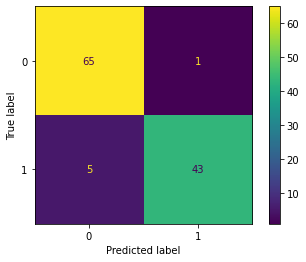

In [49]:
plot_confusion_matrix(RFC,X_test,y_test)